We will import the "waterfall_sm" file and attempt to convert it into a 380 x (265 x 471) tensor. We will use Pytorch to compute tensor SVD to denoise the tensor (which eventually, or I guess hopefully, will be DMD'ed to create a perfect loop)

In [43]:
import torch 
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt

In [2]:
os.path.abspath(os.getcwd())

'/home/lijiaw/waterfallDMD/scratch'

In [5]:
data = pd.read_csv('../data/waterfall_sm.csv', header=None)

In [25]:
data_np = data.to_numpy()

In [27]:
data_ts = data_np.reshape(380, 265, 471)

In [39]:
# data_sm will be the torch tensor object
data_sm = torch.from_numpy(data_ts).float()

In [40]:
# perform tensor SVD
U, S, Vh = torch.linalg.svd(data_sm)

In [46]:
S.shape

torch.Size([380, 265])

Well... this was unexpected. It seems like the svd function actually just took individual SVD's for each frame. I'm a little unsure how to even subset it at this moment anymore. 

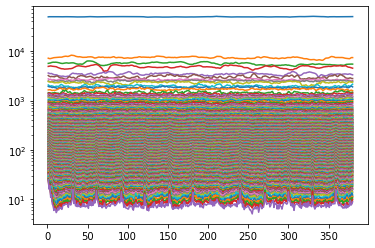

In [45]:
# plot singular values 
plt.semilogy(np.arange(1, 381), S)

In [47]:
# save tensor object; 
torch.save(data_sm, '../data/data_sm_tensor.pt')

In [17]:
# make example data of 2 x 4; convert to 2 x 2 x 2
ex = np.array([[1, 2, 3, 4], [5, 6, 7, 8]])
ex

array([[1, 2, 3, 4],
       [5, 6, 7, 8]])

In [20]:
ex2 = ex.reshape(2,2,2)

In [21]:
ex2

array([[[1, 2],
        [3, 4]],

       [[5, 6],
        [7, 8]]])

In [22]:
265*471

124815